# CREDIT CARD FRAUD DETECTION - BINARY CLASSIFICATION 
ARTIFICIAL NEURAL NETWORKS 

This model aims to respond the following research question, how effective are artificial neural networks (ANNs), specifically deep learning binary classification models, in accurately detecting fraudulent credit card transactions within a large database?

In [4]:
pip install Tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [7]:
#Importing all the libraries.
import pandas as pd 
import numpy as np 
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation 
%matplotlib inline 
sns.set(color_codes=True)
from numpy import loadtxt 
from keras.models import Sequential 
from keras.layers import Dense
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
import random
import tensorflow
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers 
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression 
from sklearn.preprocessing import StandardScaler 
from keras.optimizers import SGD 
from matplotlib import pyplot 



# EDA

In [8]:
# Name of my dataset 
df = pd.read_csv("creditcard_2023.csv") 

In [9]:
df.head(10) 


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [10]:
df.dtypes 

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [11]:
df = df.drop(columns=['id','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])


In [12]:
df.shape 


(568630, 16)

In [13]:
duplicate_rows_df = df[df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (1, 16)


In [14]:
df.count()

V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
Amount    568630
Class     568630
dtype: int64

In [15]:
df = df.drop_duplicates() 
df.head(10) 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,14278.97,0
5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,0.451788,0.036071,0.877239,-0.289721,0.630992,6901.49,0
6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,-1.735016,0.523425,-0.693622,0.796567,18954.45,0
7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,-1.039421,0.822749,1.853521,0.176637,12298.23,0
8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,0.437518,-1.107172,0.548485,-0.216078,0.742616,22052.90,0
9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,0.453469,-0.096412,1.316902,1.097693,0.491384,210.35,0


In [16]:
df.count() 

V1        568629
V2        568629
V3        568629
V4        568629
V5        568629
V6        568629
V7        568629
V8        568629
V9        568629
V10       568629
V11       568629
V12       568629
V13       568629
V14       568629
Amount    568629
Class     568629
dtype: int64

In [17]:
print(df.isnull().sum()) 


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
Amount    0
Class     0
dtype: int64


In [18]:
fraudulent = df[df['Class'] == 1]
non_fraudulent= df[df['Class'] == 0]


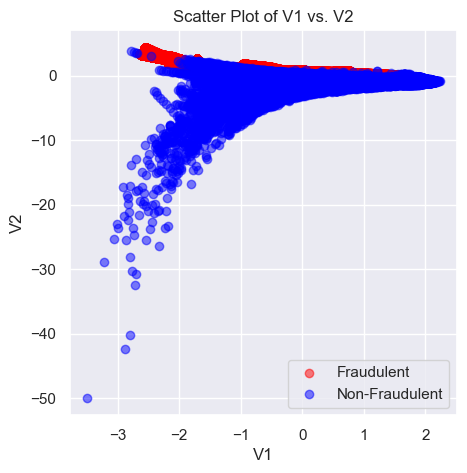

In [19]:
#  Relationships between V1 and V2
plt.figure(figsize=(5, 5))
plt.scatter(fraudulent['V1'], fraudulent['V2'], c='red', label='Fraudulent', alpha=0.5)
plt.scatter(non_fraudulent['V1'], non_fraudulent['V2'], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.title('Scatter Plot of V1 vs. V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.grid(True)
plt.show()


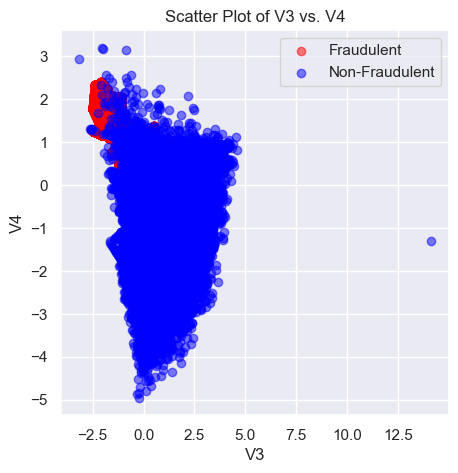

In [20]:
#  Relationships between V1 and V2
plt.figure(figsize=(5, 5))
plt.scatter(fraudulent['V3'], fraudulent['V4'], c='red', label='Fraudulent', alpha=0.5)
plt.scatter(non_fraudulent['V3'], non_fraudulent['V4'], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.title('Scatter Plot of V3 vs. V4')
plt.xlabel('V3')
plt.ylabel('V4')
plt.legend()
plt.grid(True)
plt.show()

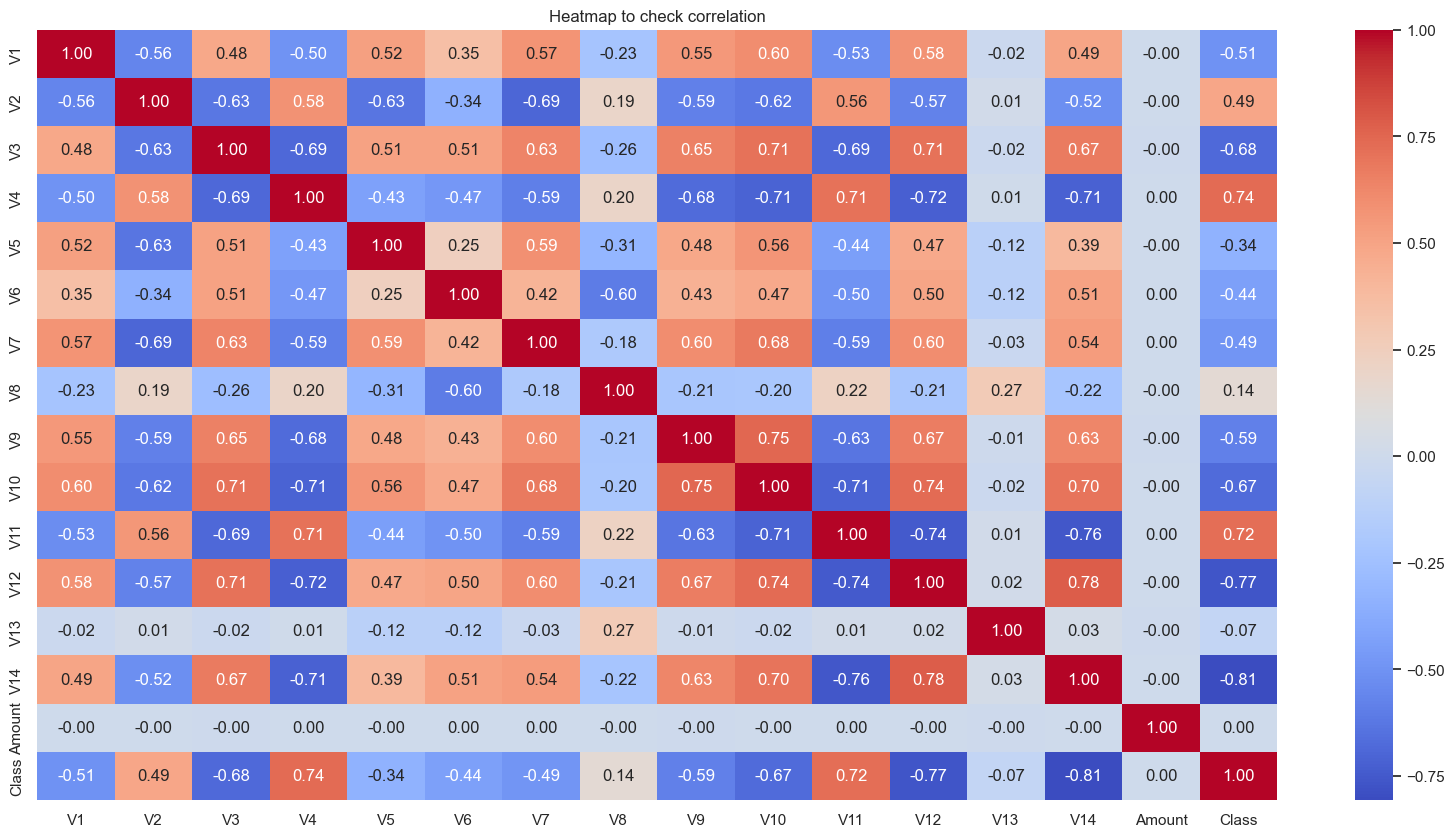

In [21]:
# heatmap to visualize  correlations 
plt.figure(figsize=(20,10)) 
c= df.corr() 
sns.heatmap(c,cmap="coolwarm",annot=True, fmt=".2f") 
plt.title('Heatmap to check correlation')
plt.show()

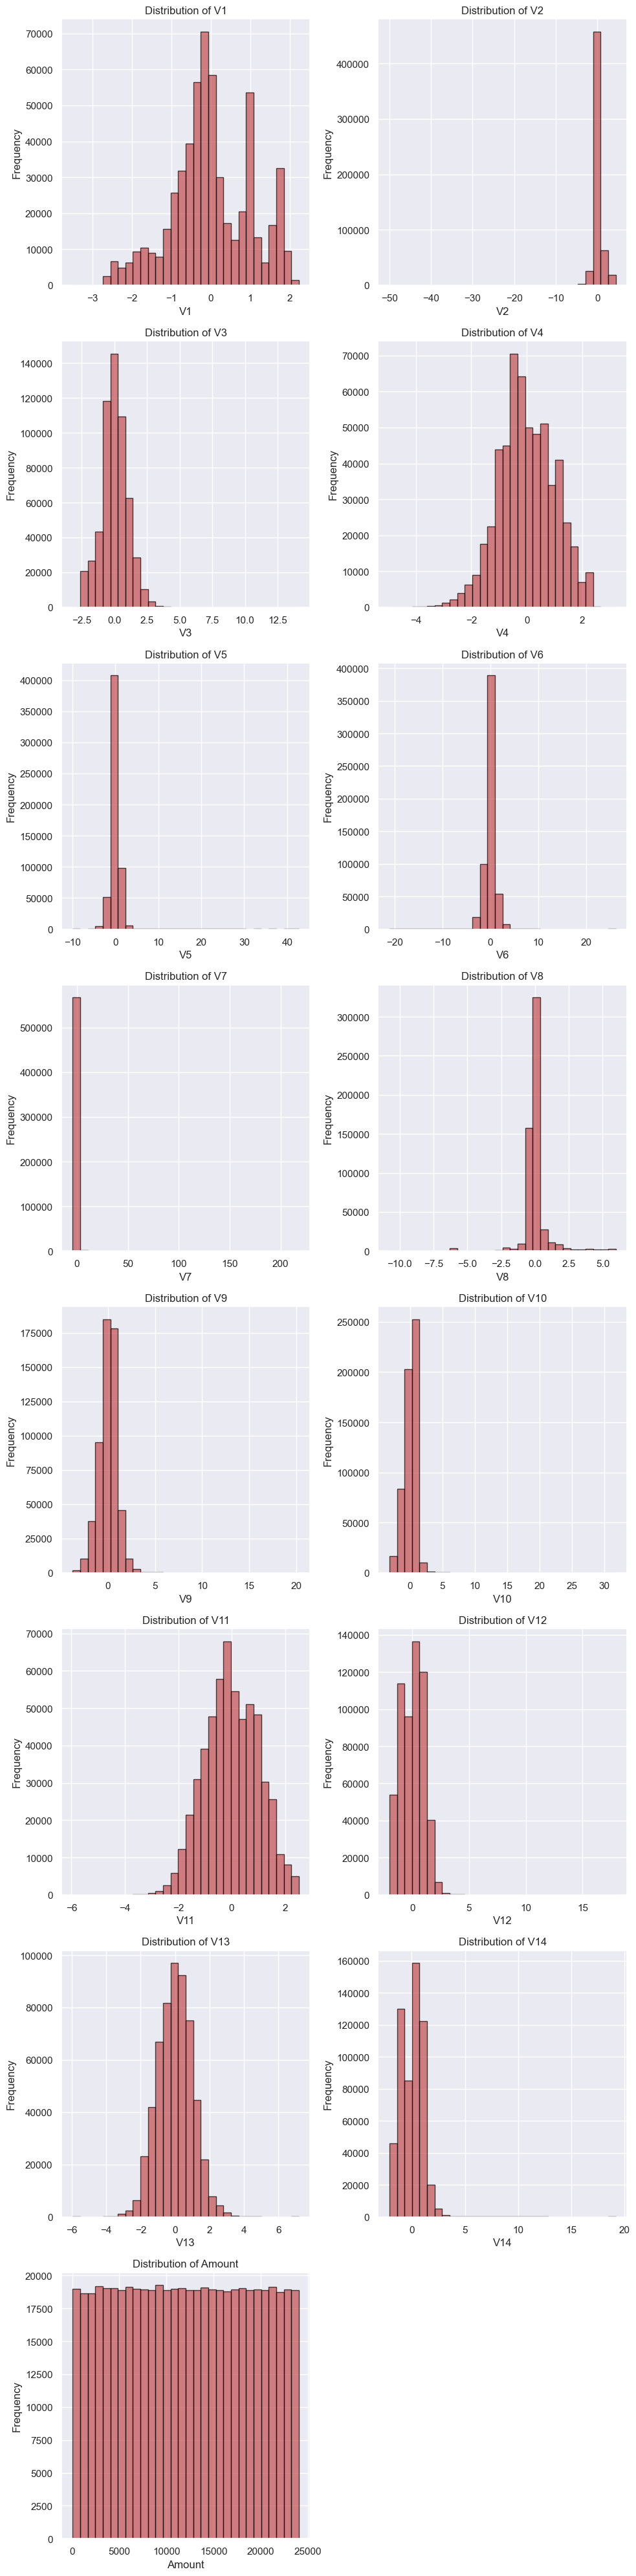

In [22]:


# Extracting the numerical features, excluding the 'Class' column
numerical_features = df.drop(columns=['Class'])

# number of subplots based on the number of  features
num_features = numerical_features.shape[1]
num_rows = (num_features - 1) // 2 + 1  # Number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))


axes = axes.flatten()

#  histograms 
for i, feature in enumerate(numerical_features.columns):
    axes[i].hist(numerical_features[feature], bins=30, alpha=0.7, edgecolor='black', color='r',)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots 
if num_features % 2 != 0:
    fig.delaxes(axes[num_features])

plt.tight_layout()
plt.show()


In [23]:

# drop column 'Class'
numerical_features = df.drop(columns=['Class'])

# new empty DataFrame to store the normalized features
normalized_features = pd.DataFrame()

# Min-Max scaling to each column separately
for column in numerical_features.columns:
    scaled_column = minmax_scale(numerical_features[column])
    normalized_features[column] = scaled_column

# rows of the DataFrame with Min-Max scaled features
print(normalized_features.head())



         V1        V2        V3        V4        V5        V6        V7  \
0  0.565091  0.911068  0.328143  0.597037  0.191428  0.462018  0.021919   
1  0.782703  0.913159  0.216170  0.554606  0.194228  0.455582  0.021412   
2  0.565157  0.902238  0.283790  0.551131  0.190372  0.476540  0.022929   
3  0.584043  0.910345  0.284848  0.473588  0.193703  0.470699  0.021915   
4  0.574494  0.916671  0.272150  0.552320  0.190981  0.457739  0.022548   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.635760  0.186457  0.108955  0.586624  0.116075  0.381492  0.124850   
1  0.635574  0.170651  0.105862  0.719723  0.179826  0.496800  0.128549   
2  0.637820  0.145310  0.110474  0.670942  0.134424  0.514384  0.128039   
3  0.639641  0.147624  0.107164  0.614308  0.138351  0.498240  0.125345   
4  0.630815  0.199894  0.118424  0.561099  0.153004  0.562634  0.110395   

     Amount  
0  0.747484  
1  0.270170  
2  0.102690  
3  0.222361  
4  0.593122  


In [24]:
from sklearn.model_selection import train_test_split 

#  'Class' is the target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split the data with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)


In [25]:

# Build neural network in Keras
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))  # Set input_dim to 21/16
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))  
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                192       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 12)                300       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1573 (6.14 KB)
Trainable params: 1573 (6.1

In [27]:
# Compile neural network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
#model.fit(X, y, epochs=10, batch_size=5, verbose=0) 
model.fit(X_train, y_train, epochs=20, batch_size=150)

Epoch 1/20
3033/3033 [==============================] - 7s 2ms/step - loss: 0.8052 - accuracy: 0.8276
Epoch 2/20
3033/3033 [==============================] - 9s 3ms/step - loss: 0.2035 - accuracy: 0.9275
Epoch 3/20
3033/3033 [==============================] - 5s 2ms/step - loss: 0.1553 - accuracy: 0.9435
Epoch 4/20
3033/3033 [==============================] - 5s 2ms/step - loss: 0.1402 - accuracy: 0.9494
Epoch 5/20
3033/3033 [==============================] - 5s 2ms/step - loss: 0.1321 - accuracy: 0.9519
Epoch 6/20
3033/3033 [==============================] - 5s 2ms/step - loss: 0.1258 - accuracy: 0.9537
Epoch 7/20
3033/3033 [==============================] - 6s 2ms/step - loss: 0.1231 - accuracy: 0.9549
Epoch 8/20
3033/3033 [==============================] - 6s 2ms/step - loss: 0.1217 - accuracy: 0.9553
Epoch 9/20
3033/3033 [==============================] - 6s 2ms/step - loss: 0.1193 - accuracy: 0.9563
Epoch 10/20
3033/3033 [==============================] - 4s 1ms/step - loss: 0.118

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


3554/3554 [==============================] - 5s 1ms/step - loss: 0.1136 - accuracy: 0.9567
Test Loss: 0.1136
Test Accuracy: 0.9567


In [30]:
scores_train = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%" % (scores_train[1] * 100))

scores_test = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%" % (scores_test[1] * 100))


14216/14216 [==============================] - 18s 1ms/step - loss: 0.1145 - accuracy: 0.9571
Training Accuracy: 95.71%
3554/3554 [==============================] - 4s 1ms/step - loss: 0.1136 - accuracy: 0.9567
Testing Accuracy: 95.67%


In [31]:
 #evaluate the keras model 
_, accuracy = model.evaluate(X, y) 
print('Accuracy: %.2f' % (accuracy*100)) 

17770/17770 [==============================] - 21s 1ms/step - loss: 0.1143 - accuracy: 0.9570
Accuracy: 95.70


In [32]:
y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
c_matrix

3554/3554 [==============================] - 5s 1ms/step


array([[56013,   850],
       [ 4081, 52782]], dtype=int64)

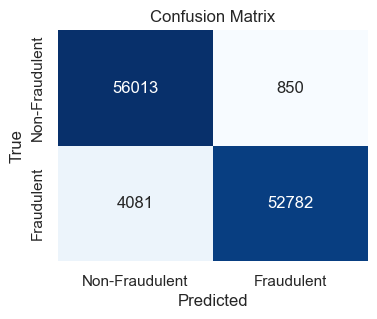

In [33]:

# Define class labels
class_labels = ["Non-Fraudulent", "Fraudulent"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4, 3))
sns.set(font_scale=1)  # Adjust font size
sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [34]:
# Get training and test loss histories
history = model.fit(X_train, y_train, epochs=15, verbose=0, validation_data=(X_test, y_test))

In [35]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]



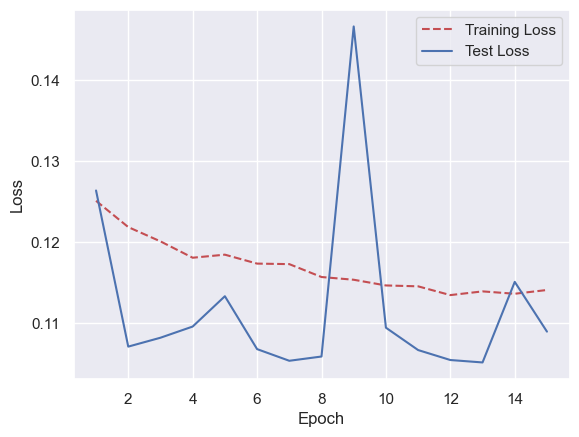

In [36]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

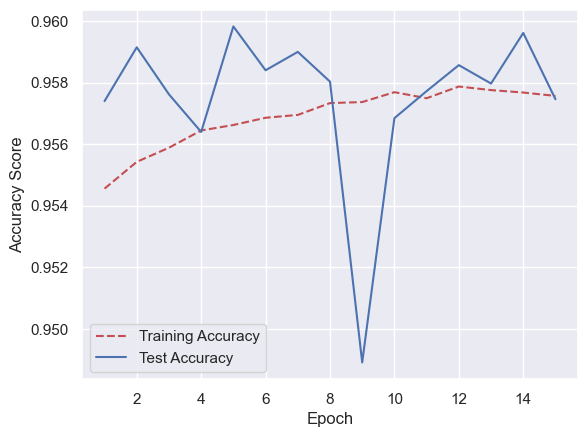

In [37]:
# Get training and test accuracy histories
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();